# Topics

## 1. Numpy and Arrays
## 2. Matplotlib

In [2]:
import numpy as np

# New import below
import matplotlib.pyplot as plt

In [2]:
'''
Recall the question of "is" versus "==" for lists

'''
from copy import copy
a = [0]*10
b = a
c = a[:]
d = copy(a)
e = a[1:-1]
print('b == a:', b == a)
print('b is a:', b is a)
print('c == a:', c == a)
print('c is a:', c is a)
print('d == a:', d == a)
print('d is a:', d is a)

#The following shows clearly a and b point to the same object -- i.e. they are the same object.
#And that neither c nor d is the same object as a. e is aso decoupled from a or b.
a[1] = 2
print('a = ', a)
print('b = ', b)
print('c = ', c)
print('d = ', c)
print('e = ', e)

b == a: True
b is a: True
c == a: True
c is a: False
d == a: True
d is a: False
a =  [0, 2, 0, 0, 0, 0, 0, 0, 0, 0]
b =  [0, 2, 0, 0, 0, 0, 0, 0, 0, 0]
c =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
d =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
e =  [0, 0, 0, 0, 0, 0, 0, 0]


In [3]:
'''
The "is" versus "==" question for arrays
'''
a = np.zeros(10)
b = a
c = a[:]
d = copy(a)
e = a[1:-1]

print('b == a:', b == a)
print('b is a:', b is a)
print('c == a:', c == a)
print('c is a:', c is a)
print('d == a:', d == a)
print('d is a:', d is a)

# The following shows only d is a copy -- notably, it's confusing whether c is a copy or not! 
# Even e is pointing to a!
# LESSON: if you really want to create a copy, use the copy module.
a[3] = 0.2
print('a =', a)
print('b =', b)
print('c =', c)
print('d =', d)
print('e =', e)

b == a: [ True  True  True  True  True  True  True  True  True  True]
b is a: True
c == a: [ True  True  True  True  True  True  True  True  True  True]
c is a: False
d == a: [ True  True  True  True  True  True  True  True  True  True]
d is a: False
a = [ 0.   0.   0.   0.2  0.   0.   0.   0.   0.   0. ]
b = [ 0.   0.   0.   0.2  0.   0.   0.   0.   0.   0. ]
c = [ 0.   0.   0.   0.2  0.   0.   0.   0.   0.   0. ]
d = [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
e = [ 0.   0.   0.2  0.   0.   0.   0.   0. ]


## Breakout Problem:
### 1. Write a function that creates an array of temperature values in Celsius -- with a start temperature, an end temperature, and the number of steps in between -- and then compute the Fahrenheit equivalents (a new array).  
### 2. Write another function that does it the list comprehension way.    
### 3. Both functions should take three variables: Tstart, Tend, numsteps

In [11]:
def ctemp(Tstart, Tend, numsteps):
    Cdeg = np.linspace(Tstart, Tend, numsteps)
    Fdeg = Cdeg * 9./5 + 32.
    return Fdeg
    
print(ctemp(10, 50, 5))

def comp(Tstart, Tend, numsteps):
    Cdeg = [Tstart + i * (Tend - Tstart) / (numsteps - 1) for i in range(numsteps)]
    Fdeg = [c * 9./5 + 32. for c in Cdeg]
    return Fdeg
    
print(comp(10, 50, 5))

[  50.   68.   86.  104.  122.]
[50.0, 68.0, 86.0, 104.0, 122.0]


In [14]:
'''
Breakout Soln
'''

def convert_temp(Tstart, Tend, numsteps):
    Cdeg = [Tstart+i*(Tend-Tstart)/(numsteps-1) for i in range(numsteps)]
    Fdeg = [c*9./5+32. for c in Cdeg]
    return Fdeg
print(convert_temp(0., 100., 11))

def convert_temp_arr(Tstart, Tend, numsteps):
    Cdeg = np.linspace(Tstart, Tend, numsteps)
    Fdeg = Cdeg*9./5 + 32.
    return Fdeg

print(convert_temp_arr(0., 100., 11))

[32.0, 50.0, 68.0, 86.0, 104.0, 122.0, 140.0, 158.0, 176.0, 194.0, 212.0]
[  32.   50.   68.   86.  104.  122.  140.  158.  176.  194.  212.]


In [ ]:
Tstart = 0.
Tend = 100
numsteps = 1001  #change steps from 11, to 101, to 1001
%timeit convert_temp(Tstart, Tend, numsteps)   #if one tries 11 loops the list-comprehension way actually wins.  
                                               # the larger the number, the faster the array way.
%timeit convert_temp_arr(Tstart, Tend, numsteps)

## Explicit Specification of Numpy Data Type

In [22]:
# arange is a "generalize range" that can handle floats
x = np.arange(0, 10, 1.)
print(type(x), x.dtype)
print(x)

y = np.arange(0, 10, 1)
print(type(y), y.dtype)
print('Array of default integers', y)

y_8 = np.arange(0, 10, 1, dtype = np.int8)
print(type(y_8), y_8.dtype)
print('Array of 8-bit integers', y_8)

# print("Difference betwee 64-bit and 8-bit integer:")
# # try idx = 6, 7, 8
idx = 8
print((y[2]**y[idx]))
print((y_8[2]**y_8[idx]))

<class 'numpy.ndarray'> float64
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
<class 'numpy.ndarray'> int64
Array of default integers [0 1 2 3 4 5 6 7 8 9]
<class 'numpy.ndarray'> int8
Array of 8-bit integers [0 1 2 3 4 5 6 7 8 9]
256
0


In [23]:
# printing numbers using their binary representation
# use 128 and then 127 and see what happens
print('{0:b}'.format(np.int8(127)))
print('{0:b}'.format(np.int8(-127)))

1111111
-1111111


## The reason:

"int8	Byte (-128 to 127)"

(From https://docs.scipy.org/doc/numpy-1.13.0/user/basics.types.html)

## You can use 8 bits to represent 0 to 255 or -128 to 127.  

## Another way to think about this:

    127 = 01111111

## That last digit at the front, you can either use it to take you to 255 or you can use it as to specify the sign.

## One implication: there is no +128;  or +128 and -128 are the same: 

    suppose 0 = "-", 1 = "+"

    (-127) = 01111111  --> (-128) = 10000000    # you don't change the sign bit
    
    This would be the same as +128
    
## The binary representation is -10000000 because only -128 exists.

## Caution: Sign convention can be different.  On some systems, it may be -127 to 128.  



In [26]:
# ues intg = 64, 128
intg = 128
print(np.int8(-intg) == np.int8(intg))

print('Is it really that strange?')
print('Binary Representation (for 128, you only see the negative version b/c only -128 exists):')
print('{0:b}'.format(np.int8(intg)))
print('{0:b}'.format(np.int8(-intg)))


True
Is it really that strange?
Binary Representation (for 128, you only see the negative version b/c only -128 exists):
-10000000
-10000000


In [27]:
#******Don't run it -- first, predict what you are going to get*****

intg = 256
print(np.int8(intg))


0



## To see all data types: Google "numpy data type", and click on the one that says, 

Data types — NumPy v1.x Manual

## To find out numpy version

In [28]:
np.__version__

'1.13.3'

## Array Indexing

In [39]:
x = np.linspace(0, 10, 11)
idx1 = x > 6
print(x)
print(idx1)
print('number of elements with value greater than 6:', sum(idx1))
y = x[idx1]
print(y)
z = x[x > 6]
# or
print(z)

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
[False False False False False False False  True  True  True  True]
number of elements with value greater than 6: 4
[  7.   8.   9.  10.]
[  7.   8.   9.  10.]


In [40]:
x[idx1] = 11
print(x)

[  0.   1.   2.   3.   4.   5.   6.  11.  11.  11.  11.]


In [43]:
'''Alternatively, use np.where()'''
x = np.linspace(0, 10, 11)
idx = np.where(x > 6)
print('idx:', idx)
# This could have easily been a bug!
# print('number of elements with value greater than 6:', len(idx))
print('number of elements with value greater than 6:', len(idx[0]))
y = x[idx]
print(y)

idx: (array([ 7,  8,  9, 10]),)
number of elements with value greater than 6: 4
[  7.   8.   9.  10.]


## Mini-Breakout Exercise

- ### Define an array, x, with 31 elements bewteen 1 and 4 (inclusive)
- ### Find a new array, y, each element of which is the corresponding element in x squared
- ### Find x1 -- it should consist of the elements in x that are between 2 and 3 (inclusive)
- ### Find y1 -- it should consist of the elements in y that correspond to the x elements that are between 2 and 3 (inclusive); but you can't do $y1 = x1^2$
- ### You may use the boolean array method or np.where()
- ### Print x1 and y1 on two separate lines

In [71]:
x = np.linspace(1, 4, 31)
y = x**2
# x2 = x[x >= 2] 
# x1 = x2[x2 <= 3]
# y2 = y[y >= 2**2]
# y1 = y2[y2 <= 3**2]

# solutions
idx = (x >= 2) * (x <= 3)
x1 = x[idx]
y1 = y[idx]
print(x1)
print(y1)

[ 2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9  3. ]
[ 4.    4.41  4.84  5.29  5.76  6.25  6.76  7.29  7.84  8.41  9.  ]


## Module for Plotting -- matplotlib

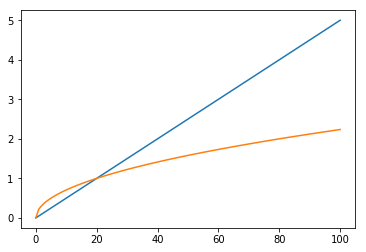

In [2]:
%matplotlib inline

y = np.linspace(0, 5, 101)
# x (the i) is assumed to be the index 
plt.plot(y)
# note: one can plot two curves in a single figure
plt.plot(np.sqrt(y))
plt.show()

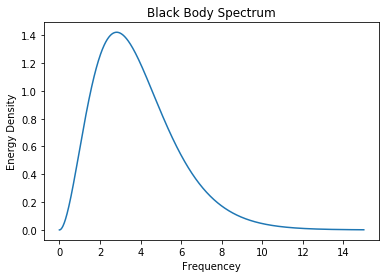

In [3]:
%matplotlib inline
''' 
"Bells and whistles" of plotting

'''

import numpy as np
import matplotlib.pyplot as plt
y = np.linspace(1e-6, 15, 1000)  # why do I start at 1e-6 and not 0?
b = y**3/(np.exp(y)-1)
plt.plot(y,b)
plt.xlabel('Frequencey')
plt.ylabel('Energy Density')
plt.title('Black Body Spectrum')
# can save figure as pdf (other formats) -- you should check!
plt.savefig('planck.pdf')
plt.show()

In [2]:
%matplotlib inline
'''
If you want to be fancy...Don't try this at home yet!

*--------->for some students: Maybe it's the matplotlib verions??  <-------------------

'''
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['text.usetex'] = True

y = np.linspace(1e-6, 15, 1000)  
b = y**3/(np.exp(y)-1)
plt.plot(y, b, lw = 2)
plt.xlabel(r'$Frequencey$', fontsize = 15)
plt.ylabel(r'$Energy\, Density$', fontsize = 15)
## \displaystyle is necessary for showing symbols in quotient the same size as other symbols.
plt.text(5., 1.2, r'$\displaystyle B(f, T) = \frac{y^3}{e^y-1},\, y = hf/kT$', 
         fontsize = 15, color = 'b')
plt.title(r'$\mathrm{Black\, Body\, Spectrum}$', fontsize = 20)
#plt.savefig('planck.pdf')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'latex': 'latex'

In [82]:
# try this import -- does it work?
#from matplotlib import rc
# How about this one?
from matplotlib import rc, rcParams

In [3]:
%matplotlib inline
'''If the above cell didn't work for you, try this one. '''

from matplotlib import rc
rc('xtick', labelsize=12)
rc('ytick', labelsize=12)

rc('text', usetex=True)
rc('font', family='serif')

y = np.linspace(1e-6, 15, 1000)  
b = y**3/(np.exp(y)-1)
plt.plot(y, b, lw = 2)
plt.xlabel(r'$Frequencey$', fontsize = 15)
plt.ylabel(r'$Energy\, Density$', fontsize = 15)
plt.text(5., 1.2, r'$\displaystyle B(f, T) = \frac{y^3}{e^y-1},\, y = hf/kT$', 
         fontsize = 15, color = 'b')
plt.title(r'$\mathrm{Black\, Body\, Spectrum}$', fontsize = 20)
#plt.savefig('planck.pdf')
plt.show()



FileNotFoundError: [Errno 2] No such file or directory: 'latex': 'latex'

## Breakout Exercise: Plot the function $y(x) = cos(2x + 1)$ and $z(x) =
cos(-e^x)$ between 0 and $\pi$.

- ### Choose an appropriate resolution (too coarse the curve won't be smooth; too fine, unnecessary)
- ### You can use two consecutive plt.plot() statements.  Try to plot $y(x)$ first.
- ### Give the figure a title ('Fequency Modulation'), by using plt.title(str).
- ### Label the axes as "Amp" (for amplitude) and "Freq" (for frequency).
- ### Use plt.text(x, y, str) to print the function you're plotting in the blank area of the plot.

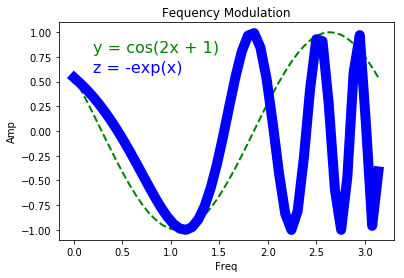

In [3]:
x = np.linspace(1e-6, np.pi)
y = np.cos(2 * x + 1)
z = np.cos(-np.exp(x))
plt.xlabel('Freq')
plt.ylabel('Amp')
plt.title('Fequency Modulation')
plt.plot(x, y)
plt.plot(x, z)
# plt.text(0.2, 0.8, 'y = cos(2x + 1)', fontsize = 16, color = 'g')
# plt.text(0.2, 0.6, 'z = -exp(x)', fontsize = 16, color = 'b')
# plt.plot(x, y, 'g--', lw=2)
# plt.plot(x, z, 'b-', lw=10)
plt.show()

## Subplots and "Axes"

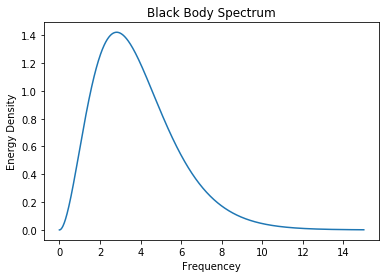

In [3]:
%matplotlib inline
''' 
Using subplots (axes) -- different from the cell above,
but equivalent way of plotting.

'''
y = np.linspace(1e-6, 15, 1000)  
b = y**3/(np.exp(y)-1)

# The following two lines are new
fig = plt.figure()
# 111: subplot structure: 1 by 1 grid
ax = fig.add_subplot(111)

# note how I do everything differently below but the results are the same as before
# -- now I'm using the methods associated with the objects ax and fig, rather than the 
# functions in the pyplot module.
# (except plt.show())
ax.plot(y,b)
ax.set_xlabel('Frequencey')
ax.set_ylabel('Energy Density')
ax.set_title('Black Body Spectrum')
fig.savefig('planck.pdf')

plt.show()

## Example:

### For x between –5 and 5, 

- ### plot the follow two functions in one figure but two separate subplots, stacked vertically:

### $ sin(x)cos(x^2)$

###       and 

### $ e^{-\frac{x}{4}}sin(x)$

- ### Plot the first curve with dots, and the second with a smooth dashed line a little bit thicker than the default thickness

- ### Add horisontal and vertical grid lines to the second subplot

- ### Add a title to the figure, "Two Functions"

- ### Label the horizontal and veritcal axes for both subplots

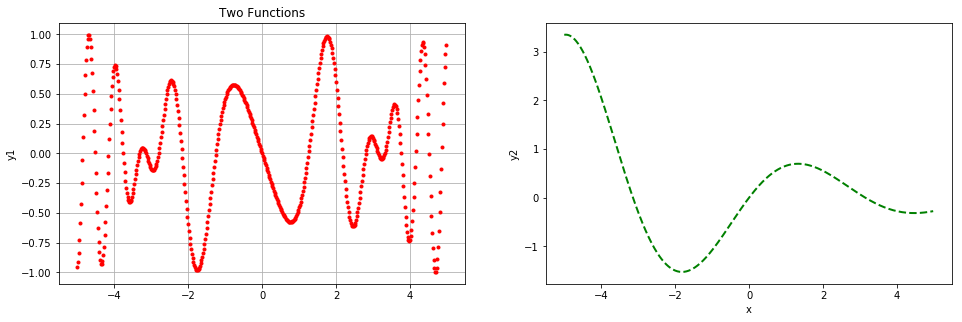

In [2]:
'''
Now more than one subplot

Pay close attention -- I have changed things a bit since last time

'''
Xmin = -5.0; Xmax = 5.0
Npoints = 500
DelX= (Xmax-Xmin)/Npoints
x = np.arange(Xmin, Xmax, DelX)
y1 = -np.sin(x)*np.cos(x**2)
y2 = np.exp(-x/4.)*np.sin (x)

fig = plt.figure(figsize=(16, 5))
#fig = plt.figure(figsize = (15, 5))  #note how I specify figure size.

# (211): 2 by 1 arrrangment, 1st plot.
ax1 = fig.add_subplot(121)       
fig.subplots_adjust(top=0.85)   # without this, won't be able to see plot title.
ax1.set_title('Two Functions')

#plt.plot(x, y1, 'r', lw=2)
ax1.plot(x, y1, 'r.', lw=2)
ax1.grid(True)                  # has to come after plot; plt.grid() works too
ax1.set_ylabel('y1')

# (212): 2 by 1 arrrangment, 2nd plot.
ax2 = fig.add_subplot(122)
#plt.plot(x, y2, 'g', lw=2)      
ax2.plot(x, y2, 'g--', lw=2)      
ax2.set_xlabel('x')
ax2.set_ylabel('y2')

plt.show()

## Mini-Breakout Exercise
- ### Do the above, except this time the two subplots should be side by side
- ### Select an appropriate figure size for this arrangement

## End of week4-2